# Python Data Analysis

By: Eng. Mohamed Saber

# Full Data Analysis Case-study (Data analysis for the city of Amsterdam)

[1] Libraries & Data Importing

##### Import libraries and read in the city of Amsterdam csv file

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [54]:
listing_df = pd.read_csv("listings.csv")
listing_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5121,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.29,2,0,0,NaN
1,2595,Rental unit in New York · ★4.68 · Studio · 1 b...,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,2022-06-21,0.30,3,325,1,NaN
2,14991,Rental unit in New York · ★4.93 · 1 bedroom · ...,59023,Bianca,Manhattan,Lower East Side,40.72207,-73.98976,Private room,120,5,22,2023-05-14,0.14,1,268,3,NaN
3,5136,Rental unit in Brooklyn · ★5.0 · 2 bedrooms · ...,7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,276,21,3,2022-08-10,0.03,1,275,1,NaN
4,59709,Rental unit in New York · ★4.77 · 2 bedrooms ·...,186084,Ricardo & Ashlie,Manhattan,Chinatown,40.71780,-73.99320,Entire home/apt,325,7,69,2023-04-28,0.47,1,38,23,NaN


In [55]:
listing_df.shape # To get the number of rows and columns

(43566, 18)

In [56]:
neighbourhoods_df = pd.read_csv("neighbourhoods.csv")
neighbourhoods_df.head()

,neighbourhood_group,neighbourhood
0,Bronx,Allerton
1,Bronx,Baychester
2,Bronx,Belmont
3,Bronx,Bronxdale
4,Bronx,Castle Hill


In [10]:
neighbourhoods_df.shape

(230, 2)

In [57]:
df_combined = pd.concat([listing_df, neighbourhoods_df])# concat listing and neighbour in neighbourhood and neighbourhood_group
df_combined.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5121.0,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356.0,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60.0,30.0,50.0,2019-12-02,0.29,2.0,0.0,0.0,NaN
1,2595.0,Rental unit in New York · ★4.68 · Studio · 1 b...,2845.0,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30.0,49.0,2022-06-21,0.30,3.0,325.0,1.0,NaN
2,14991.0,Rental unit in New York · ★4.93 · 1 bedroom · ...,59023.0,Bianca,Manhattan,Lower East Side,40.72207,-73.98976,Private room,120.0,5.0,22.0,2023-05-14,0.14,1.0,268.0,3.0,NaN
3,5136.0,Rental unit in Brooklyn · ★5.0 · 2 bedrooms · ...,7378.0,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,276.0,21.0,3.0,2022-08-10,0.03,1.0,275.0,1.0,NaN
4,59709.0,Rental unit in New York · ★4.77 · 2 bedrooms ·...,186084.0,Ricardo & Ashlie,Manhattan,Chinatown,40.71780,-73.99320,Entire home/apt,325.0,7.0,69.0,2023-04-28,0.47,1.0,38.0,23.0,NaN


In [58]:
reviw_df = pd.read_csv("reviews.csv")
reviw_df.head()

,listing_id,date
0,5121,2009-05-28
1,2595,2009-11-21
2,2595,2009-12-05
3,2595,2009-12-10
4,2595,2010-04-09


In [59]:
reviw_df['last_review'] = reviw_df['date']# change date column to be last review to concat the two files 

In [60]:
reviw_df.drop(['date'],axis = 1,inplace =True)
reviw_df.head()

,listing_id,last_review
0,5121,2009-05-28
1,2595,2009-11-21
2,2595,2009-12-05
3,2595,2009-12-10
4,2595,2010-04-09


In [15]:
reviw_df.shape

(1148772, 2)

In [61]:
df = pd.concat([df_combined, reviw_df])
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,listing_id
0,5121.0,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356.0,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60.0,30.0,50.0,2019-12-02,0.29,2.0,0.0,0.0,NaN,NaN
1,2595.0,Rental unit in New York · ★4.68 · Studio · 1 b...,2845.0,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30.0,49.0,2022-06-21,0.30,3.0,325.0,1.0,NaN,NaN
2,14991.0,Rental unit in New York · ★4.93 · 1 bedroom · ...,59023.0,Bianca,Manhattan,Lower East Side,40.72207,-73.98976,Private room,120.0,5.0,22.0,2023-05-14,0.14,1.0,268.0,3.0,NaN,NaN
3,5136.0,Rental unit in Brooklyn · ★5.0 · 2 bedrooms · ...,7378.0,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,276.0,21.0,3.0,2022-08-10,0.03,1.0,275.0,1.0,NaN,NaN
4,59709.0,Rental unit in New York · ★4.77 · 2 bedrooms ·...,186084.0,Ricardo & Ashlie,Manhattan,Chinatown,40.71780,-73.99320,Entire home/apt,325.0,7.0,69.0,2023-04-28,0.47,1.0,38.0,23.0,NaN,NaN


How many rows and columns are there?

In [18]:
df.info() # Information about data

<class 'pandas.core.frame.DataFrame'>
Index: 1192568 entries, 0 to 1148771
Data columns (total 19 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   id                              43566 non-null    float64
 1   name                            43566 non-null    object 
 2   host_id                         43566 non-null    float64
 3   host_name                       43561 non-null    object 
 4   neighbourhood_group             43796 non-null    object 
 5   neighbourhood                   43796 non-null    object 
 6   latitude                        43566 non-null    float64
 7   longitude                       43566 non-null    float64
 8   room_type                       43566 non-null    object 
 9   price                           43566 non-null    float64
 10  minimum_nights                  43566 non-null    float64
 11  number_of_reviews               43566 non-null    float64
 12  last_

### [3] Data Wrangling (Cleaning & Manipulation)

##### Are there any missing / duplicated data?

In [23]:
df.isna().sum()/(df.shape[0]) * 100 # If the data contains missing data

id                                 96.346875
name                               96.346875
host_id                            96.346875
host_name                          96.347294
neighbourhood_group                96.327589
neighbourhood                      96.327589
latitude                           96.346875
longitude                          96.346875
room_type                          96.346875
price                              96.346875
minimum_nights                     96.346875
number_of_reviews                  96.346875
last_review                         0.899404
reviews_per_month                  97.226993
calculated_host_listings_count     96.346875
availability_365                   96.346875
number_of_reviews_ltm              96.346875
license                           100.000000
listing_id                          3.672411
dtype: float64

we have that column last review and listing id have less than 1 % and 3.6 % respectively so when we delete them the data will not be affected so let's drop them

In [62]:
df.drop(['listing_id',"license"],axis = 1,inplace =True)

In [63]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,5121.0,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356.0,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60.0,30.0,50.0,2019-12-02,0.29,2.0,0.0,0.0
1,2595.0,Rental unit in New York · ★4.68 · Studio · 1 b...,2845.0,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30.0,49.0,2022-06-21,0.30,3.0,325.0,1.0
2,14991.0,Rental unit in New York · ★4.93 · 1 bedroom · ...,59023.0,Bianca,Manhattan,Lower East Side,40.72207,-73.98976,Private room,120.0,5.0,22.0,2023-05-14,0.14,1.0,268.0,3.0
3,5136.0,Rental unit in Brooklyn · ★5.0 · 2 bedrooms · ...,7378.0,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,276.0,21.0,3.0,2022-08-10,0.03,1.0,275.0,1.0
4,59709.0,Rental unit in New York · ★4.77 · 2 bedrooms ·...,186084.0,Ricardo & Ashlie,Manhattan,Chinatown,40.71780,-73.99320,Entire home/apt,325.0,7.0,69.0,2023-04-28,0.47,1.0,38.0,23.0


In [26]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Bronx', 'Queens', 'Staten Island', nan],
      dtype=object)

In [27]:
df.host_name.unique()

array(['Garon', 'Jennifer', 'Bianca', ..., 'Einab', 'Quick Stay',
       'Sohaib'], dtype=object)

In [28]:
cat_columns = ['neighbourhood_group','neighbourhood','room_type','host_name']

for col in df[cat_columns]:
    if df[col].dtype == 'object':
        print(df[col].unique())
    else:
        print("Not object")

['Brooklyn' 'Manhattan' 'Bronx' 'Queens' 'Staten Island' nan]
['Bedford-Stuyvesant' 'Midtown' 'Lower East Side' 'Sunset Park'
 'Chinatown' 'Upper West Side' 'South Slope' 'Tribeca' 'Williamsburg'
 'Chelsea' 'East Village' 'Greenwich Village' 'Clinton Hill' 'East Harlem'
 'Harlem' 'Washington Heights' 'Upper East Side' 'Fort Greene'
 'Greenpoint' 'Clason Point' 'Kips Bay' 'Eastchester' 'Flatbush'
 "Hell's Kitchen" 'Crown Heights' 'Carroll Gardens' 'West Village'
 'Nolita' 'Park Slope' 'Long Island City' 'East Flatbush' 'Gowanus'
 'Forest Hills' 'Murray Hill' 'Prospect Heights' 'Astoria' 'Boerum Hill'
 'Sunnyside' 'Kingsbridge' 'St. George' 'Ridgewood' 'Mott Haven'
 'Morningside Heights' 'Bushwick' 'Ditmars Steinway' 'Middle Village'
 'Jamaica' 'Windsor Terrace' 'University Heights' 'Brooklyn Heights'
 'Flatiron District' 'Rockaway Beach' 'Allerton' 'Emerson Hill'
 'East New York' 'Theater District' 'Fort Hamilton' 'Bensonhurst'
 'Rego Park' 'Wakefield' 'Kensington' 'Stuyvesant Town' 'Wo

This code simply checks if specific columns in a dataset have text (like words or sentences) or not. If a column has text, it shows what unique text values are in that column. If not, it prints "Not object" to indicate it's not text.

1 - Question: What is the distribution of room types in Amsterdam, and which one is the most common?

In [29]:
room_type_distribution = df['room_type'].value_counts()
most_common_room_type = room_type_distribution.idxmax()

In [30]:
room_type_distribution

room_type
Entire home/apt    24649
Private room       18186
Shared room          580
Hotel room           151
Name: count, dtype: int64

In [31]:
most_common_room_type

'Entire home/apt'

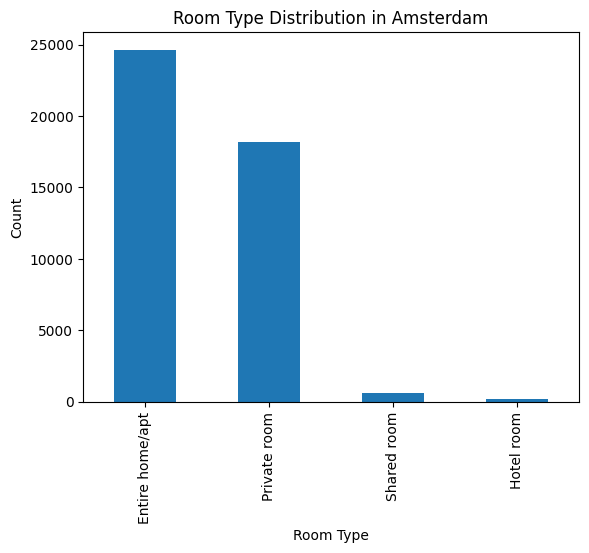

In [32]:
room_type_distribution.plot(kind='bar')
plt.title("Room Type Distribution in Amsterdam")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show()

room type distribution in Amsterdam by counting occurrences of each type, identifying the most common type

2 - Question: What is the average price of Airbnb listings in Amsterdam by room type?

In [36]:
average_price_by_room_type = df.groupby('room_type')['price'].mean()

In [37]:
average_price_by_room_type

room_type
Entire home/apt    273.369062
Hotel room         483.615894
Private room       160.973166
Shared room        125.874138
Name: price, dtype: float64

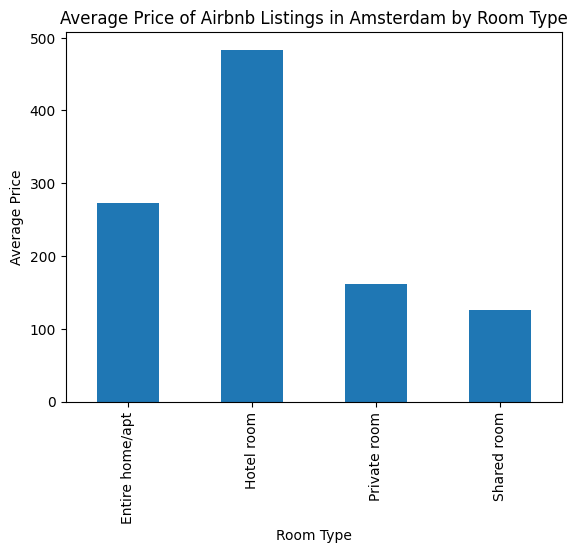

In [42]:
average_price_by_room_type.plot(kind='bar')
plt.title("Average Price of Airbnb Listings in Amsterdam by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price")
plt.show()

This code segment answers the question about the average prices of Airbnb listings in Amsterdam, categorized by room type. It calculates and presents the average price for each type of room, allowing us to see how prices vary based on the type of accommodation

3 - How does the neighborhood group affect Airbnb prices?

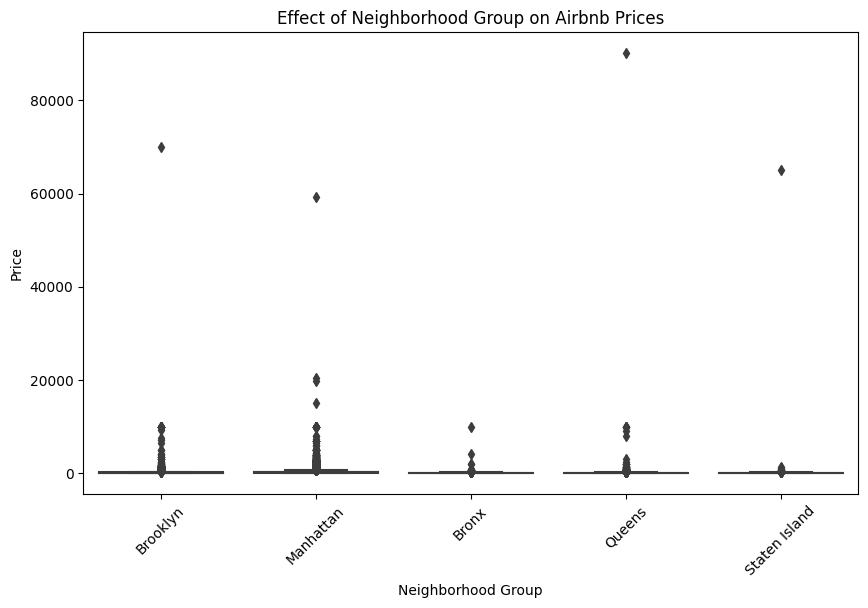

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title("Effect of Neighborhood Group on Airbnb Prices")
plt.xlabel("Neighborhood Group")
plt.ylabel("Price")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The box plot visually displays the relationship between neighborhood groups and Airbnb prices. Each box represents a neighborhood group, and the height of the box shows the interquartile range of prices within that group. The line inside the box represents the median price, while the whiskers indicate the range of prices. By examining the box plot, you can see how prices vary across different neighborhood groups, helping to understand the impact of location on Airbnb prices.

4 - Question: Are there any hosts with multiple listings, and how many listings do they have?

In [45]:
host_listing_counts = df['host_id'].value_counts()
multiple_listings_hosts = host_listing_counts[host_listing_counts > 1]

In [46]:
multiple_listings_hosts

host_id
107434423.0    569
3223938.0      487
305240193.0    412
496944100.0    342
19303369.0     235
              ... 
277379.0         2
480764728.0      2
3832468.0        2
459925707.0      2
16257970.0       2
Name: count, Length: 4879, dtype: int64

/home/mohamed/jupyter/environment/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


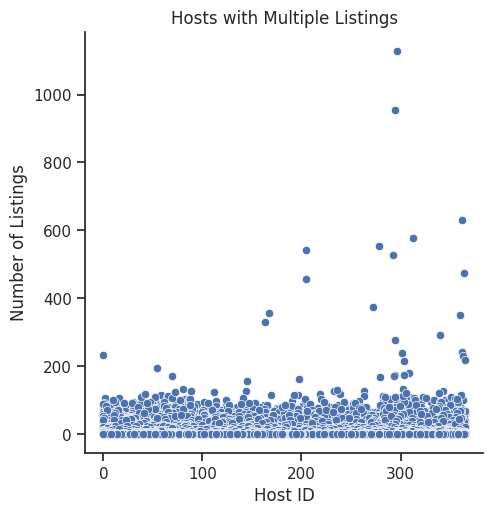

In [49]:
sns.set(style="ticks")
sns.pairplot(df, x_vars=["availability_365"], y_vars=["number_of_reviews_ltm"], height=5)
plt.title("Hosts with Multiple Listings")
plt.xlabel("Host ID")
plt.ylabel("Number of Listings")
plt.show()

In this Seaborn "Pair Plot," we're exploring the connection between year-round listing availability ("availability_365") and the number of reviews received in the last 12 months ("number_of_reviews_ltm"). Each point represents a specific listing, allowing us to analyze their interaction. The plot helps identify trends, like whether higher year-round availability correlates with more or fewer reviews in the last 12 months

5 - Question: What is the relationship between the number of reviews and the availability of listings?

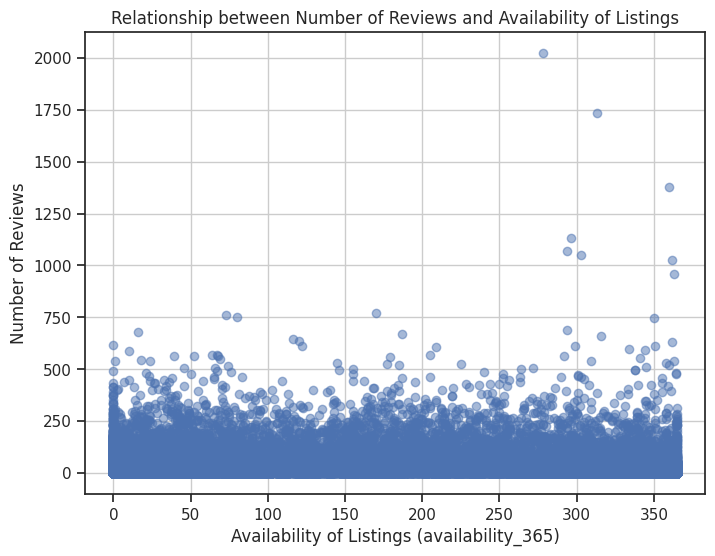

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(df['availability_365'], df['number_of_reviews'], alpha=0.5)
plt.title("Relationship between Number of Reviews and Availability of Listings")
plt.xlabel("Availability of Listings (availability_365)")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.show()

This code section visualizes the relationship between the number of reviews and listing availability using a scatter plot. Each point represents a listing, with availability throughout the year on the x-axis and the number of reviews on the y-axis. It helps us see if there's a correlation between higher availability and more reviews.

6 - How has the number of reviews per month changed over time?

In [64]:
df['last_review'] = pd.to_datetime(df['last_review'])
# Group by the 'last_review' year and month, and calculate the mean number of reviews per month
reviews_over_time = df.groupby(df['last_review'].dt.to_period('M'))['reviews_per_month'].mean()

In [65]:
reviews_over_time

last_review
2009-04         NaN
2009-05         NaN
2009-06         NaN
2009-07         NaN
2009-08         NaN
             ...   
2023-02    0.788950
2023-03    0.814181
2023-04    0.999138
2023-05    2.286958
2023-06    3.395470
Freq: M, Name: reviews_per_month, Length: 171, dtype: float64

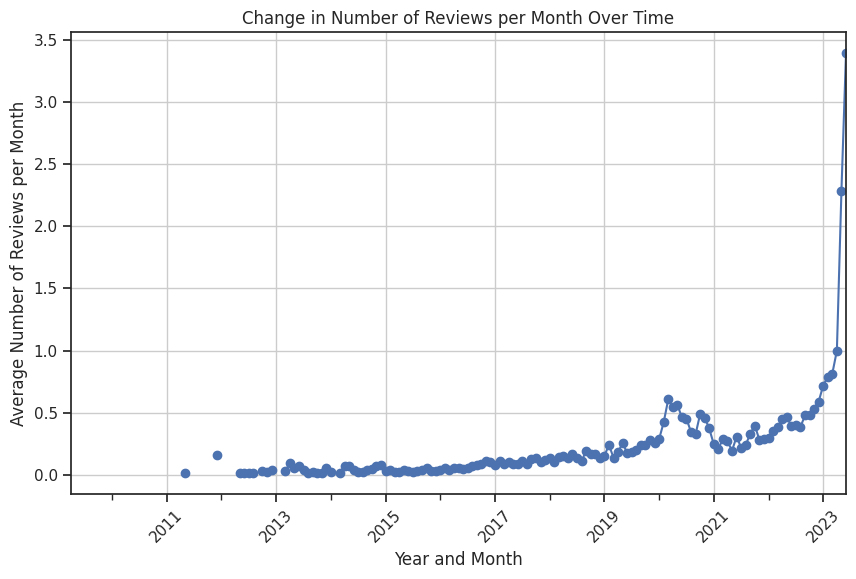

In [66]:
plt.figure(figsize=(10, 6))
reviews_over_time.plot(kind='line', marker='o')
plt.title("Change in Number of Reviews per Month Over Time")
plt.xlabel("Year and Month")
plt.ylabel("Average Number of Reviews per Month")
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

This code tracks monthly review count changes over time by converting 'last_review' to datetime, grouping data by year and month, averaging monthly review counts, and plotting a trend line. It aids users in spotting review trends and dynamics.

7 - Is there any correlation between the minimum nights required and the price of listings?

In [68]:
numeric_columns = ['availability_365', 'number_of_reviews', 'price', 'minimum_nights']
numeric_df = df[numeric_columns]
corr_matrix = numeric_df.corr()